# Reparameterization Trick
Following https://gokererdogan.github.io/2016/07/01/reparameterization-trick/

Considering a normal distribution with mean $\mu$ and unit variance, $q_{\mu}(x) = N(\mu,1)$, and we want to adjust $\theta$ for optimizing the second moment

$
\hat\mu=\arg\min_{\mu} \mathcal L(\mu)=\arg\min_{\mu}\mathbb E_q[x^2]
$

Apparently, analytically we have $\nabla_\mu\mathcal L=\nabla_\mu(\mu^2+1)=2\mu$.

But we want to compare numerical computation of this quantity using both REINFORCE and the Reparametrization method.

For the REINFORMCE algorithm, we have 

$\nabla_\mu\mathcal L=\mathbb E_q(x^2\nabla_\mu\log q(x))=\mathbb E_q(x^2(x-\mu))=\mathbb E_q(x^3-x^2\mu))=\mu^3+3\mu-\mu(\mu^2+1)=2\mu$

One way to keep the expectation of gradients, while reduce the variance of the gradients is add a *baseline* which is not a function of $x$. A very simple approach is use the mean such that

$\nabla_\mu\mathcal L=\mathbb E_q([x^2-\mathbb E_q(x^2)]\nabla_\mu\log q(x))=\mathbb E_q([x^2-\mathbb E_q(x^2)](x-\mu))=2\mu$

For the reparametrization,
$
x = \mu + \epsilon, \quad \epsilon \sim \mathcal{N}(0,1)
$

Then we have
$\nabla_\mu\mathcal L=\nabla_\mu\mathbb E_{\mathcal N(0,1)} (\mu+\epsilon)^2=\mathbb E_{\mathcal N(0,1)}\nabla_\mu (\mu+\epsilon)^2=\mathbb E_{\mathcal N(0,1)}[2(\mu+\epsilon)]=2\mu$

Let have some impression on the gradient estimate given by three methods by comparing them on a single instance:

In [9]:
import numpy as np
N = 1000
theta = 2.0
eps = np.random.randn(N)
x = theta + eps

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size
grad3 = lambda x: np.sum((np.square(x)-np.sum(np.square(x))/x.size)*(x-theta)) / x.size

print("grad of REINFORCE=",grad1(x))
print("grad of REINFORCE + baseline=",grad3(x))
print("grad of Reparametrization = ",grad2(eps))


grad of REINFORCE= 4.097396172279478
grad of REINFORCE + baseline= 4.01904525710015
grad of Reparametrization =  4.031061372628896


Let us check the variance for different sample sizes.

In [8]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
means3 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))
vars3 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
est3 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        est3[r] = grad3(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    means3[i] = np.mean(est3)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    vars3[i] = np.var(est3)
    
print(means1)
print(means2)
print(means3)
print
print (vars1)
print (vars2)
print (vars3)

[4.55637839 4.10093377 4.03974593 3.98094517 4.00103464]
[4.11529199 4.02050707 3.99739092 3.99746569 3.99969491]
[3.89359207 3.98636754 4.01466151 3.99127621 4.00268074]
[1.54686336e+01 9.41211946e-01 1.28511151e-01 8.85848125e-03
 8.06813959e-04]
[3.18476310e-01 3.68889932e-02 3.64861942e-03 2.92998741e-04
 2.77811917e-05]
[7.63648618e+00 4.21657403e-01 5.56574377e-02 3.59091375e-03
 3.74900223e-04]


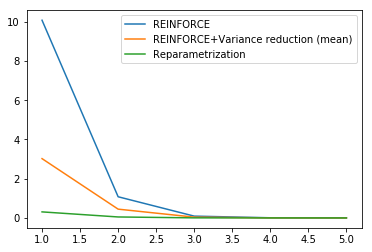

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.log10(Ns),vars1)
plt.plot(np.log10(Ns),vars3)
plt.plot(np.log10(Ns),vars2)

#plt.plot(vars1)
#plt.plot(vars2)
plt.legend(['REINFORCE', 'REINFORCE+Variance reduction (mean)','Reparametrization'])

Variance of the estimates using reparameterization trick is one order of magnitude smaller than the estimates from the first method!